# Assignment-2 Deep Learning AI2100

## Name-Gunjit Mittal        Roll No.-AI21BTECH11011

In [1]:
# Importing the required libraries
import torch
import matplotlib.pyplot as plt
import torch.nn.functional as F
from torchvision.datasets import CIFAR10
from torchvision.transforms import ToTensor
from sklearn.decomposition import PCA

/Users/gunji/miniconda3/envs/torch-gpu/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: dlopen(/Users/gunji/miniconda3/envs/torch-gpu/lib/python3.10/site-packages/torchvision/image.so, 0x0006): Symbol not found: __ZN3c106detail19maybe_wrap_dim_slowIxEET_S2_S2_b
  Referenced from: <B2683E74-6A85-3157-9DC8-E4658667B8F5> /Users/gunji/miniconda3/envs/torch-gpu/lib/python3.10/site-packages/torchvision/image.so
  Expected in:     <479B05C1-363C-3799-AAF4-CF79A0358897> /Users/gunji/miniconda3/envs/torch-gpu/lib/python3.10/site-packages/torch/lib/libc10.dylib
  warn(f"Failed to load image Python extension: {e}")


In [2]:
torch.manual_seed(0) # Setting the seed for reproducibility
dataset = CIFAR10(root='data/', download=True, transform=ToTensor()) # Loading the dataset

Files already downloaded and verified


In [3]:
# Creating a dictionary to store the images of each class
data_class = {i:[] for i in range(10)}
for i in range(300):
    current_class = dataset[i][1]
    data_class[current_class].append(dataset[i][0].reshape(1,3,32,32))
data_class = {label:torch.Tensor(torch.vstack(data_class[label][:3])) for label in data_class} # Stacking 10 images of each class

In [4]:

class CNN():
    """
    _summary_ : This class contains all the functions required to build a CNN model.
    """
    
    def sigmoid(self,x): #sigmoid function
        return 1/(1+(torch.exp(-x)))
    
    
    def relu(self,x): #relu function
        return torch.max(x, torch.zeros_like(x))
    
    
    def tanh(self,x): #tanh function
        return (torch.exp(x)-torch.exp(-x))/(torch.exp(x)+torch.exp(-x))
    
    
    def prelu(self,x): #prelu function
        return torch.max(x, 0.01*x)
    
    
    def softmax(self,x): #softmax function
        return torch.exp(x)/torch.sum(torch.exp(x))
    
    
    def idenetity(self,x): #identity function
        return x
    
    
    def conv2d(self,img,kernel,stride,padding,activation,show_shape=False,show_image=False):
        """_summary_ : This function performs 2D convolution on the input image with the given kernel and returns the final image.
        Args:
            img (tensor): Input image/map
            kernel (tensor): Kernel to be convolved
            stride (list): Stride of the kernel
            padding (list/tuple): Padding to be applied to the image
            activation (function): Activation function to be applied
            show_shape (bool, optional): Show shapes of input, kernel and output. Defaults to False.
            show_image (bool, optional): Show images of input, kernel and output. Defaults to False.

        Returns:
            tensor: Final map after convolution
        """
        assert img.shape[0] == kernel.shape[0], "Number of channels in the image and kernel should be same"
        assert len(img.shape) == len(kernel.shape) == 3, "Input image and kernel should be 3D tensors"
        pad_img = F.pad(input=img,pad=(padding[1],padding[1],padding[0],padding[0]),mode='constant',value=0)
        a,b = kernel.shape[1],kernel.shape[2]
        c,d = pad_img.shape[1],pad_img.shape[2]
        stride = [stride if stride>1 else 1 for stride in stride]
        new_img = torch.zeros((int((c-a)/stride[0])+1),(int((d-b)/stride[1])+1),dtype=torch.float)
        for i in range(0,c-a+1,stride[0]):
            for j in range(0,d-b+1,stride[1]):
                new_img[int(i/stride[0])][int(j/stride[1])] += torch.sum(torch.mul(pad_img[:pad_img.shape[0],i:i+a,j:j+b],kernel))
        final_img = activation(new_img)
        if show_shape:
            print(img.shape)
            print(kernel.shape)
            print(final_img.shape)
        if show_image:
            plt.imshow(img.permute(1,2,0))
            plt.show()
            plt.imshow(kernel.permute(1,2,0))
            plt.show()
            plt.imshow(final_img)
            plt.show()
        return final_img
    
    
    def pooling(self,map, pool_size, stride, pooling_type,show_shape=False,show_image=False):
        
        """_summary_ : This function performs pooling on the input image/map with the given kernel and returns the final image/map.

        Args:
            map (tensor):Input image/map
            pool_size (list/tuple): Size of the pooling kernel
            stride (list): Stride of the kernel
            pooling_type (string): Type of pooling to be performed
            show_shape (bool, optional): Shows shape of input and output maps. Defaults to False.
            show_image (bool, optional): Shows image of input and output maps. Defaults to False.

        Returns:
            tensor: Final map after pooling
        """
        
        a,b = pool_size[0],pool_size[1]
        c,d = map.shape[0],map.shape[1]
        if stride is None:
            stride = [a.b]
        stride[0] = stride if stride[0]>a else a 
        stride[1] = stride if stride[1]>b else b
        new_map = torch.zeros((int((c-a)/stride[0])+1),(int((d-b)/stride[1])+1),dtype=torch.float)
        for i in range(0,c-a+1,stride[0]):
            for j in range(0,d-b+1,stride[1]):
                if pooling_type == "max":
                    new_map[int(i/stride[0])][int(j/stride[1])] = torch.max(map[i:i+a,j:j+b])
                elif pooling_type == "avg":
                    new_map[int(i/stride[0])][int(j/stride[1])] = torch.mean(map[i:i+a,j:j+b])
        if show_shape:
            print(map.shape)
            print(new_map.shape)
        if show_image:
            plt.imshow(map)
            plt.show()
            plt.imshow(new_map)
            plt.show()
        return new_map
    
    
    def convolution_layer(self,img,no_kernels, kernel_size, stride, padding, activation,show_shape=False):
        
        """_summary_ : This function performs convolution on the input image with the given number of kernels and returns the final image.

        Args:
            img (tensor): Input image
            no_kernels (int): Number of kernels to be convolved
            kernel_size (list/tuple): Size of the kernel
            stride (list): Stride of the kernel
            padding (list/tuple): Padding to be applied to the image
            activation (function): Activation function to be applied
            show_shape (bool, optional): Shows shape of the convolutions operations used within the layer. Defaults to False.

        Returns:
            tensor: Final map after convolution
        """
        
        conv_image = torch.empty((no_kernels,int((img.shape[1]-kernel_size[1]+2*padding[0])/stride[0])+1,int((img.shape[2]-kernel_size[2]+2*padding[1])/stride[1])+1),dtype=torch.float)
        for i in range(no_kernels):
            kernel = (2*torch.rand(kernel_size))-1
            conv_image[i]=(self.conv2d(img,kernel,stride,padding,activation,show_shape,False))
        return conv_image
    
    
    def pooling_layer(self,img, pool_size, stride, pooling_type,show_shape=False):
        
        """_summary_ : This function performs pooling on the input image with the given number of kernels and returns the final image.

        Args:
            img (tensor): Input image
            pool_size (list/tuple): Size of the pooling kernel
            stride (list): Stride of the kernel
            pooling_type (string): Type of pooling to be performed
            show_shape (bool, optional): Shows shape of the pooling operations used within the layer. Defaults to False.
        Returns:
            tensor: Final map after pooling
        """
        
        pool_image = torch.empty((img.shape[0],int((img.shape[1]-pool_size[0])/stride[0])+1,int((img.shape[2]-pool_size[1])/stride[1])+1),dtype=torch.float)
        for i in range(img.shape[0]):
            pool_image[i]=(self.pooling(img[i],pool_size,stride,pooling_type,show_shape,False))
        return pool_image
    
    
    def gap(self,img, show_shape=False):
        
        """_summary_ : This function performs global average pooling on the input image and returns the final image. It is a special case of pooling layer function.

        Args:
            img (tensor): Input image
            show_shape (bool, optional): Shows shape of the pooling operations used within the layer. Defaults to False.
            
        Returns:
            tensor: Final map after global average pooling
        """
        
        pool_image = torch.empty((img.shape[0],1,1),dtype=torch.float)
        for i in range(img.shape[0]):
            pool_image[i]=torch.mean(img[i])
        if show_shape:
            print(img.shape)
            print(pool_image.shape)
        return pool_image
    
    
    # Q5 Flatten Layer
    def flatten_layer(self,img, output_size):
        
        """_summary_ : This function flattens the input image and returns the final image after multiplying the layer with a weight matrix to output the desired size.
        
        Args:
            img (tensor): Input image
            output_size (int): Size of the output image

        Returns:
            tensor: Final vector after flattening in the desired size
        """
        
        img = torch.flatten(img)
        self.W1 = (2*torch.rand((img.shape[0],output_size)))-1
        return torch.matmul(img,self.W1)
    
    
    def mlp_layer(self,img, no_neurons, activation):
        
        """_summary_ : This function performs a single layer of the MLP and returns the final image.
        
        Args:
            img (tensor): Input image
            no_neurons (int): Number of neurons in the layer
            activation (function): Activation function to be applied

        Returns:
            tensor: Output of the MLP layer
        """
        
        w = (2*torch.rand((img.shape[0],no_neurons)))-1
        b = (2*torch.rand((no_neurons)))-1
        return activation((torch.matmul(img,w)+b))
    
    # Q6. MLP. For output without softmax, use output_activation = Identity
    def mlp(self, img, no_layers, no_neurons, activation, output_size,output_activation):
        
        """_summary_ : This function performs the entire MLP and returns the final image.
        
        Args:  
            img (tensor): Input image
            no_layers (int): Number of layers in the MLP
            no_neurons (list): Number of neurons in each layer
            activation (function): Activation function to be applied
            output_size (int): Size of the output image
            output_activation (function): Activation function to be applied to the output layer

        Returns:
            tensor: Output of the MLP
        """
        
        for i in range(no_layers):
            img = self.mlp_layer(img,no_neurons[i],activation)
        fin_img = self.mlp_layer(img,output_size,output_activation)
        return fin_img

In [5]:
# Initializing the CNN
my_net = CNN()

In [6]:
# Loading the image
img_ten = data_class[0][0]
kernel = (2*torch.rand((3,3,3)))-1

## Q1

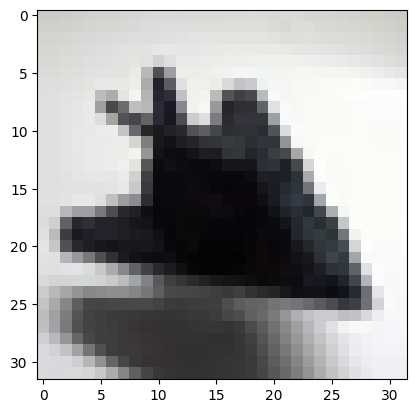

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


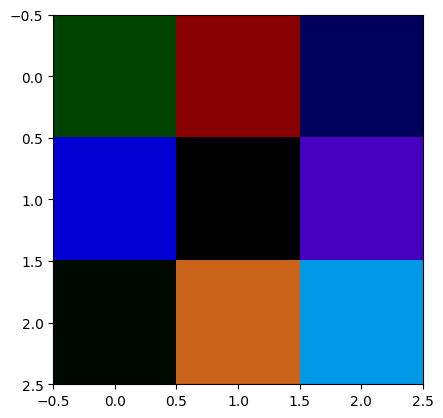

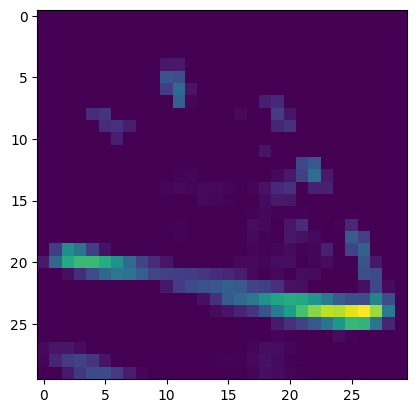

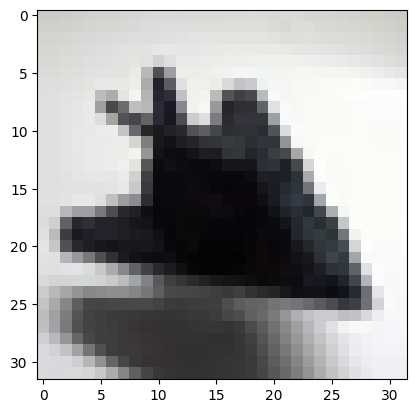

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


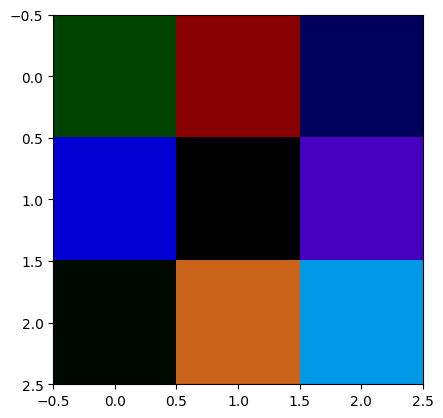

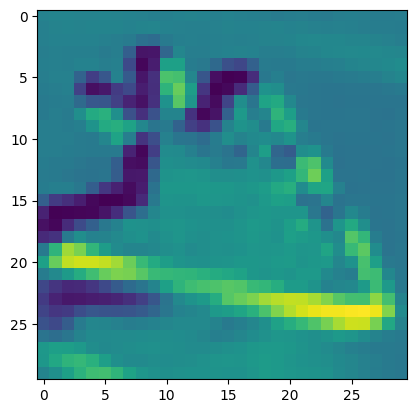

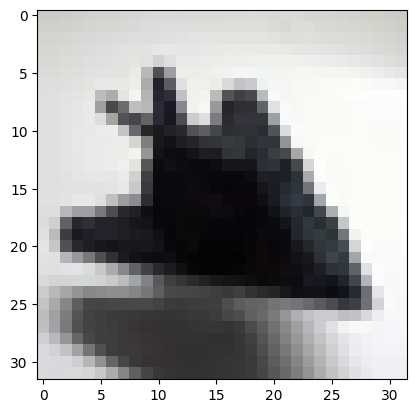

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


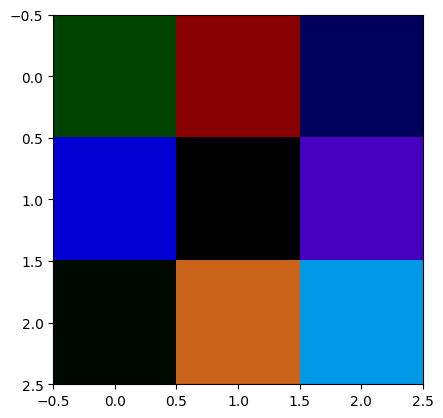

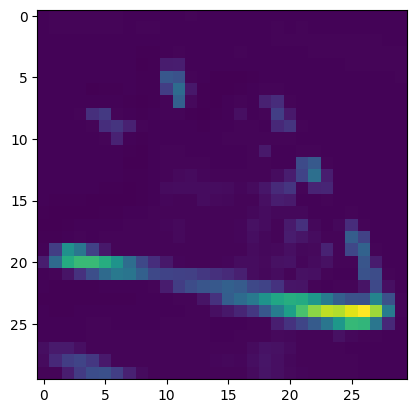

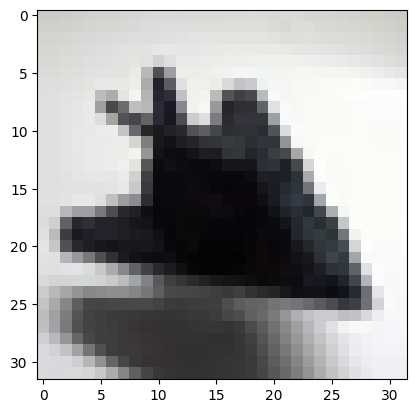

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


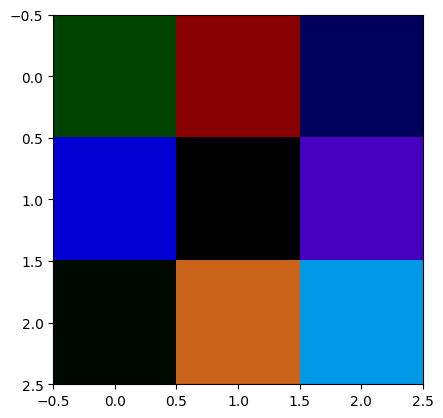

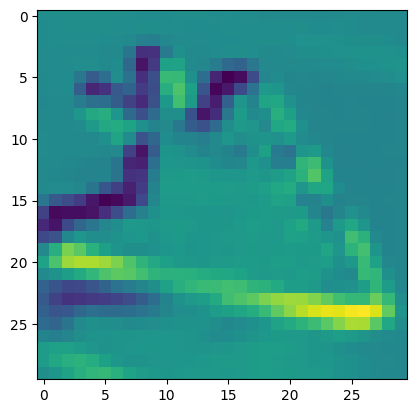

In [7]:
# Applying convolution to image with 1 kernel
out1 = my_net.conv2d(img_ten,kernel,[1,1],(0,0),my_net.relu,show_shape=False,show_image=True)
out1 = my_net.conv2d(img_ten,kernel,[1,1],(0,0),my_net.tanh,show_shape=False,show_image=True)
out1 = my_net.conv2d(img_ten,kernel,[1,1],(0,0),my_net.prelu,show_shape=False,show_image=True)
out1 = my_net.conv2d(img_ten,kernel,[1,1],(0,0),my_net.sigmoid,show_shape=False,show_image=True)

As we can see different activation functions produce different result.
It is able to take multi channel input and a kernel of correspoding volume.

## Q2

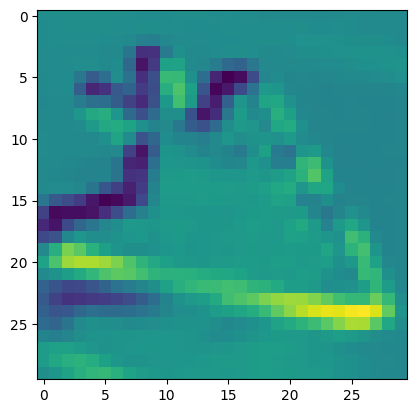

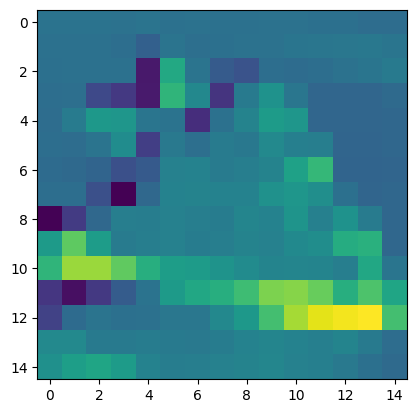

In [8]:
# Applying pooling to the output of convolution
out2 = my_net.pooling(out1,(2,2),[2,2],"max",show_shape=False,show_image=True)

## Q3

In [9]:
# Applying a convolution layer to image with 3 kernels
out1 = my_net.convolution_layer(img_ten,4,(3,3,3),[2,2],(4,4),my_net.relu,show_shape=True)
print(out1.shape)

torch.Size([3, 32, 32])
torch.Size([3, 3, 3])
torch.Size([19, 19])
torch.Size([3, 32, 32])
torch.Size([3, 3, 3])
torch.Size([19, 19])
torch.Size([3, 32, 32])
torch.Size([3, 3, 3])
torch.Size([19, 19])
torch.Size([3, 32, 32])
torch.Size([3, 3, 3])
torch.Size([19, 19])
torch.Size([4, 19, 19])


Output width = $ \frac{W−k+2p}{s} + 1$ \
In this case we have W = 32, k=3, p=4 and s=2 \
So output width = $\frac{32-3+2\times4}2+1 = \frac{37}{2}+1 = 19$

## Q4

In [10]:
# Applying a pooling layer to image
out2 = my_net.pooling_layer(out1,(2,2),[2,2],"max",show_shape=True)

torch.Size([19, 19])
torch.Size([9, 9])
torch.Size([19, 19])
torch.Size([9, 9])
torch.Size([19, 19])
torch.Size([9, 9])
torch.Size([19, 19])
torch.Size([9, 9])


## Q7

In [11]:
def feed_forward(my_net,image):
    
    """_summary_ : This function performs the feed forward operation on the input image and returns the final output.

    Args:
        my_net (CNN): CNN object
        image (tensor): Image to be passed through the network

    Returns:
        tensor: Output of the network
    """
    
    x1 = my_net.convolution_layer(image,16,(image.shape[0],3,3),[1,1],(0,0),my_net.sigmoid)
    s1 = my_net.pooling_layer(x1,(2,2),[2,2],"max")
    x2 = my_net.convolution_layer(s1,8,(s1.shape[0],3,3),[1,1],(0,0),my_net.sigmoid)
    s2 = my_net.pooling_layer(x2,(2,2),[2,2],"max")
    x3 = my_net.gap(s2)
    s3 = my_net.flatten_layer(x3,x3.shape[0])
    y = my_net.mlp(s3,1,[s3.shape[0]],my_net.sigmoid,10,my_net.softmax)
    return y

In [12]:
# Passing a single image through the network
img = data_class[0][0]
out = feed_forward(my_net,img)
print(out)

tensor([0.0860, 0.2474, 0.1047, 0.0169, 0.0946, 0.0211, 0.0450, 0.1875, 0.1395,
        0.0575])


## Q8 a)

In [13]:
# Passing 1 image from each class through the network
for i in range (10):
    y = feed_forward(my_net,data_class[i][0])
    print(y)

tensor([0.0180, 0.1307, 0.1871, 0.1083, 0.0190, 0.3452, 0.1094, 0.0365, 0.0250,
        0.0208])
tensor([0.0302, 0.5409, 0.1478, 0.0837, 0.0340, 0.0096, 0.0618, 0.0388, 0.0061,
        0.0471])
tensor([0.0972, 0.0433, 0.0173, 0.1152, 0.0287, 0.0160, 0.0369, 0.0642, 0.5569,
        0.0243])
tensor([0.1022, 0.0811, 0.0582, 0.0153, 0.1034, 0.0393, 0.0316, 0.2805, 0.1560,
        0.1322])
tensor([0.4035, 0.0520, 0.0066, 0.0281, 0.0152, 0.0005, 0.0298, 0.0219, 0.3039,
        0.1385])
tensor([0.0412, 0.1127, 0.0102, 0.0089, 0.0181, 0.0546, 0.0093, 0.2372, 0.0396,
        0.4683])
tensor([0.0574, 0.2873, 0.1940, 0.0576, 0.0653, 0.0604, 0.0877, 0.1545, 0.0251,
        0.0107])
tensor([0.2254, 0.0523, 0.1637, 0.0100, 0.2238, 0.1487, 0.0180, 0.0139, 0.0860,
        0.0582])
tensor([0.0161, 0.1913, 0.0710, 0.0465, 0.0136, 0.0417, 0.1044, 0.0098, 0.0226,
        0.4830])
tensor([0.0432, 0.0108, 0.0069, 0.0420, 0.2889, 0.0977, 0.0605, 0.0842, 0.3023,
        0.0635])


From the outputs we can see than none of the images are correctly classified.
They are classified at random which is to be expected as the weights are all random.
No specifc trend can be observed.

## Q8 b)

In [14]:
def forward_no_mlp(my_net,image):
    
    """_summary_ : This function performs the feed forward operation on the input image and returns the final output without the MLP.
    
    Args:
        my_net (CNN): CNN object
        image (tensor): Image to be passed through the network

    Returns:
        tensor: Output of the newtork without the MLP
    """
    
    x1 = my_net.convolution_layer(image,16,(image.shape[0],3,3),[1,1],(0,0),my_net.sigmoid)
    s1 = my_net.pooling_layer(x1,(2,2),[2,2],"max")
    x2 = my_net.convolution_layer(s1,8,(s1.shape[0],3,3),[1,1],(0,0),my_net.sigmoid)
    s2 = my_net.pooling_layer(x2,(2,2),[2,2],"max")
    x3 = my_net.gap(s2)
    s3 = my_net.flatten_layer(x3,x3.shape[0])
    return s3

In [19]:
# Passing 3 images from each class through the reduced network
classes = dataset.classes
data = torch.empty((30,8))
labels = torch.empty((30))
pca = PCA(n_components=2)
for i in range(10):
    for j in range(3):
        data[i*3+j] = forward_no_mlp(my_net,data_class[i][j])
        labels[i*3+j] = i

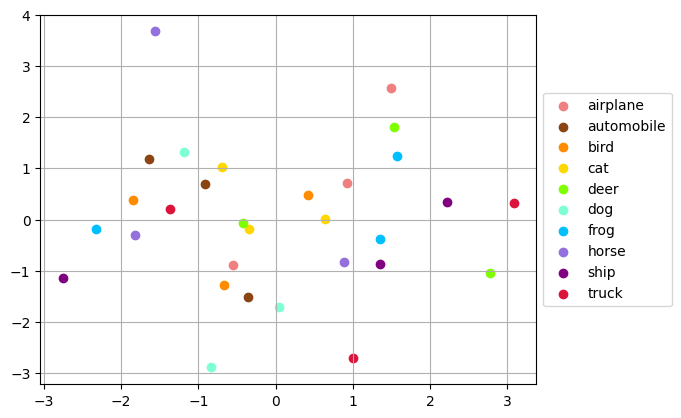

In [20]:
pca.fit(data) # Fitting the data to PCA
pca_data = pca.transform(data) # Transforming the data to 2D
colors=['lightcoral','saddlebrown','darkorange','gold','chartreuse','aquamarine','deepskyblue','mediumpurple','purple','crimson']
# Plotting the data
for i, label in zip(range(10),classes):
    plt.scatter(pca_data[labels == i, 0], pca_data[labels == i, 1],
               c=colors[i], label=label)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid()
plt.show()

As we can see from the plot there is no discrimination shown by the network.
If we see the plot we can see that they are all over the graph indicating that a randomly initialised network shows no dicrimination at all.